# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведём исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**План работы:**
1. Изучить общую информацию файла с данными 
2. Предоработака данных: 
    - найти пропуски и заменить 
    - рассмотреть и заменить(если нужно) тип данных
    - изучить уникальные значения и устранить неявные дубликаты
3. Добавить в таблицу столбцы 
4. Исследовательский анализ данных 
    - изучить и построить гистограммы по параметрам (общая пл., жилая пл., пл. кухни, цена объекта, кол-во комнат, высота потолков, тип этажа квартиры, общее кол-во этажей в доме, расстояние до центра, расстояние до парка)
    - изучить как быстро продавались квартиры (гистограмма, среднее и медиана)
    - зависит ли цена от( общ. площ., жилой площ., площ. кухни, кол-ва комнат, этажа, даты размещения)
    - средняя цена 1-го кв.м. в 10 насел. пунктах 
    - средняя стоим. квартир в Санкт-Петербурге на разном удалении от центра.
5. Общий вывод

### Откроем файл с данными и изучим общую информацию

In [1]:
#Импортируем библиотеку и читаем файл
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
#Смотрим информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
#Уточняем количество явных дубликатов в DataFrame
data.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

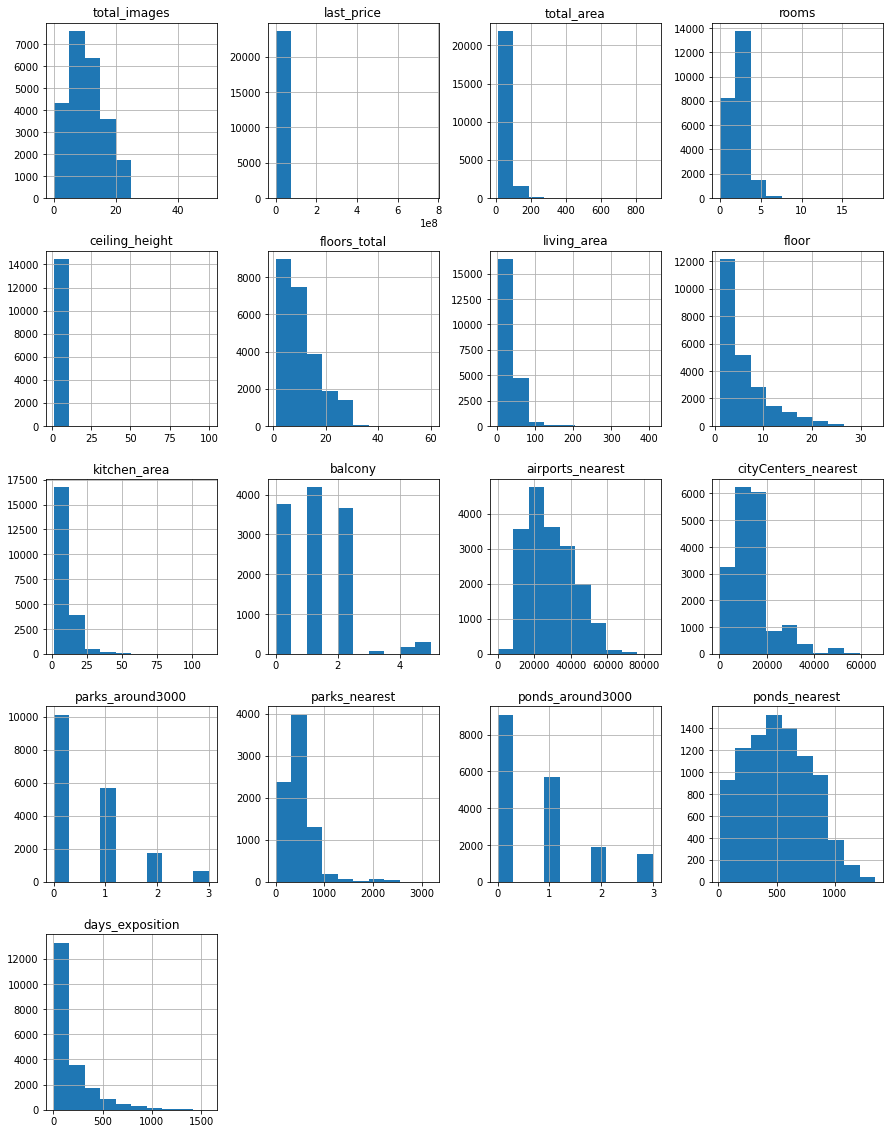

In [4]:
#Выводим гистрограммы 
data.hist(figsize=(15, 20))


In [5]:
shape = data.shape 
print('DataFrame Shape :', shape) 
print('rows_number :', shape[0]) 
print('columns_number :', shape[1])

DataFrame Shape : (23699, 22)
rows_number : 23699
columns_number : 22


**Вывод**: В данных 23699 записи. Для целого ряда столбцов, есть пропущенные значения и некорректный тип данных. По гисторгаммам видно, что в данных есть аномальные значения. Явные дубликаты отсутствуют. Данные признаны полными и достаточными для исследования.

### Выполним предобработку данных

In [6]:
#Уточняем количество пропусков 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Переименуем название столбца cityCenters_nearest на city_centers_nearest

In [7]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [8]:
#last_price - цена на момент снятия с публикации
data['last_price'] = data['last_price'].astype('int')

In [9]:
#first_day_exposition - дата публикации
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [10]:
#Преобразуем формат даты 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

In [11]:
#ceiling_height - высота потолков
#Замена NaN на медианное значение в ceiling_height
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].sort_values(ascending=False).head(30)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
20264      6.0
Name: ceiling_height, dtype: float64

In [12]:
#Замена явных ошибок ceiling_height - высота потолков 
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10
data['ceiling_height'].sort_values(ascending=False).head(30)

15061    14.00
22309    10.30
22869    10.00
5863      8.30
17442     8.00
15743     8.00
3474      8.00
20264     6.00
21227     5.80
1388      5.60
7578      5.50
1026      5.30
12628     5.30
464       5.20
1053      5.00
21923     4.90
2802      4.80
19142     4.70
1300      4.70
12401     4.65
6802      4.50
14519     4.50
13224     4.50
10159     4.50
2823      4.50
9783      4.50
3067      4.50
8018      4.45
7521      4.45
6728      4.40
Name: ceiling_height, dtype: float64

In [13]:
data.dropna(subset=['floors_total'],inplace=True)

In [14]:
data['floors_total'] = data['floors_total'].astype(int)

In [15]:
#is_apartment - аппартаменты
data['is_apartment'].mean()

0.018018018018018018

Среднее указывает, что аппартаментов около 2 % что ближе к действительности, а следовательно при заполнении анкеты их просто неуказали, заполним знечение на False

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False)
# Заменяем тип данных на "bool"
data['is_apartment'] = data['is_apartment'].astype(bool)

In [17]:
#kitchen_area - площадь кухни
#living_area - жилая площадь
# Заменяем пустые значения жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

In [18]:
#balcony - балконы
#Возможно собственники не указали наличие балконов, т.к. их нет.
#Заменим значение на 0
#Заменим тип данных 
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype(int)

In [19]:
#locality_name - населенный пункт
#Перевод в строчные буквы
data['locality_name'] = data['locality_name'].str.lower()

#Оставим только названия
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True)
)
# Уникальные значения в алфавитном порядке
set(data['locality_name'].unique())

{'69-й километр',
 nan,
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'городской большая ижора',
 'городской будогощь',
 'городской виллози',
 'городской лесогорский',
 'городской мга',
 'городской назия',
 'городской новоселье',
 'городской павлово',
 'городской рощино',
 'городской свирьстрой',
 'городской советский',
 'городской федоровское',
 'городской янино-1',
 'гости

Считаю верным решением заменить пропущенные значения на unknown

In [20]:
data.dropna(subset=['locality_name'],inplace=True)

In [21]:
#airports_nearest - расстояние до ближайшего аэропорта (м)
data['airports_nearest']

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23565, dtype: float64

Незаполненные пропуски скорее всего, указывают, что аэропорта либо нет в данном городе, либо он находится очень далеко.
Оставим значения неизменным.

In [22]:
#citycenters_nearest - расстояние до центра города (м)
data['city_centers_nearest']

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23565, dtype: float64

Незаполненные пропуски скорее всего, указывают,что объект продажи находится не в городе.
Оставим значения неизменным.

parks_around3000 - количество парков в радиусе 3 км. Оставим значения неизменным.

In [23]:
#parks_nearest - расстояние до ближайшего парка (м)
data['parks_nearest']

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23565, dtype: float64

Незаполненные пропуски скорее всего, указывают,что объект продажи находится далеко от парка.
Оставим значения неизменным.

ponds_around3000 - число водоёмов в радиусе 3 км. Оставим значения неизменным. 

In [24]:
#ponds_nearest - расстояние до ближайшего водоёма (м)
data['ponds_nearest']

0        755.0
1          NaN
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      NaN
23696      NaN
23697    196.0
23698      NaN
Name: ponds_nearest, Length: 23565, dtype: float64

Незаполненные пропуски скорее всего, указывают,что объект продажи находится далеко от водоема.
Оставим значения неизменным.

days_exposition - сколько дней было размещено объявление (от публикации до снятия)
Незаполненные пропуски скорее всего, указывают, что объект не продан. Оставим пока столбец неизменным.

In [25]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  int64         
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Вывод**:

    Мы выполнили предобработку данных и уменьшили количество пропусков в таблице
    Основными причинами пропусков могли стать:
    1) Человеческий фактор
    2) Возможны программные сбои
    3) Ранее введенные данные не откорректированы
    
    В процессе предобработки данных:
    1) Переименовали название столбца cityCenters_nearest на city_centers_nearest.
    2) Заполнили явные пропуски в таблице.
    3) Изменили тип данных, в соответствии с данными находяшимися в столбцах.
    В столбцах last_price, floors_total, balcony тип данных должны быть целочисленными, is_apartment - булевым, а first_day_exposition - тип даты и времени
    

### Добавим в таблицу новые столбцы

In [27]:
#Добавим столбец price_square_meter с ценой одного квадратного метра объекта с точностью до двух знаков после запятой
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)
data['price_square_meter'].unique()

array([120370.37,  82920.79,  92785.71, ...,  44091.71, 149511.4 ,
        41795.67])

In [28]:
#Добавим столбец day_publication день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day_publication'] = data['first_day_exposition'].dt.weekday 
data['day_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

In [29]:
#Добавим столбец month_publication месяц публикации объявления
data['month_publication'] = data['first_day_exposition'].dt.month 
data['month_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

In [30]:
#Добавим столбец year_publication год публикации объявления
data['year_publication'] = data['first_day_exposition'].dt.year 
data['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

In [31]:
#Добавим столбец type_apartment_floor тип этажа квартиры (значения — «первый», «последний», «другой»)
# Определим функцию
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['type_apartment_floor'] = data.apply(floor, axis=1) 
data['type_apartment_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [32]:
#Добавим столбец distance_city_center расстояние до центра города в километрах (переведём из м в км и округлим до ближайших целых значений)
data['distance_city_center'] = (data['city_centers_nearest'] / 1000).round(0)
data['distance_city_center'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

In [33]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,year_publication,type_apartment_floor,distance_city_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,0,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,0,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,0,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.810749,9,0,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,0,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,0,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.000000,4,0,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.700000,1,0,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.834748,12,0,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


**Вывод**: Добавлены новые столбцы в таблицу для проведения следующего этапа:
    
    - price_square_meter - цена квадратного метра объекта с точностью до двух знаков после запятой.
    - day_publication - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).
    - month_publication - месяц публикации объявления.
    - year_publication - год публикации объявления.
    - type_apartment_floor - тип этажа квартиры (значения — «первый», «последний», «другой»).
    - distance_city_center - расстояние до центра города в целых километрах.

### Проведём исследовательский анализ данных

# Анализ общей площади

In [34]:
shape = data.shape 
print('DataFrame Shape :', shape) 
print('rows_number :', shape[0]) 
print('columns_number :', shape[1])

DataFrame Shape : (23565, 28)
rows_number : 23565
columns_number : 28


In [35]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

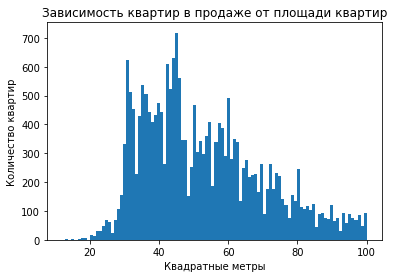

In [36]:
#Оставим значения от минимального 12 до 100 кв. метров построим гистограмму
plt.hist(data['total_area'], bins=100, range=(12,100))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: На рынке самое большое предложение квартир с общей площадью от 40 до 69 кв. метров с максимумом около 52 кв. метров.

# Анализ жилой площади

In [37]:
data['living_area'].describe()

count    23565.000000
mean        34.592091
std         22.373512
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

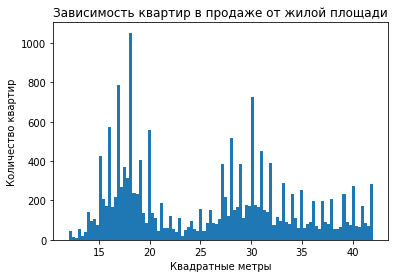

In [38]:
#Оставим значения от минимального 12 до 42 кв. метров
plt.hist(data['living_area'], bins=100, range=(12,42))
plt.title('Зависимость квартир в продаже от жилой площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Больше всего продают квартир с жилой площадью около 18 кв. м и 30 кв. метров при этом прослеживается спад предложений в средней зоне 23 кв. метра.

# Анализ площади кухни

In [39]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.499898
std          6.037750
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

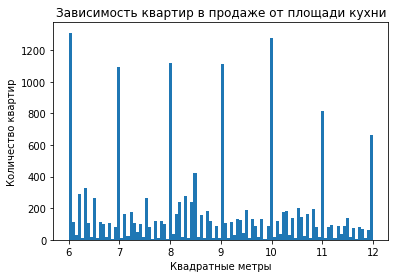

In [40]:
#Оставим значения от 6 до 12 кв. метров
plt.hist(data['kitchen_area'], bins=100, range=(6,12))
plt.title('Зависимость квартир в продаже от площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Прослеживается тенденция, что больше всего предложений с площадью кухни в 6 метров затем 10 и чередом 7,8,9 кв. метров, при этом в анкетах заметны явные всплески на целых числах.

# Анализ цены 

In [41]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

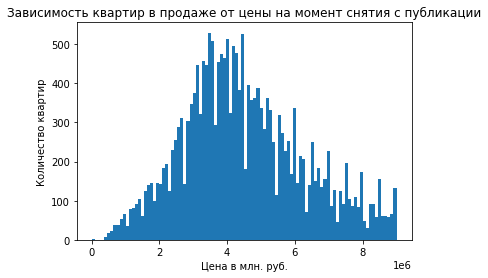

In [42]:
plt.hist(data['last_price'], bins=100, range=(1.219000e+04,9.00000e+06))
plt.title('Зависимость квартир в продаже от цены на момент снятия с публикации')
plt.xlabel('Цена в млн. руб.')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Из гисторгаммы следует, что наиболее часто цена объекта составляет 3,8 - 4,2 млн. руб.

# Количество комнат

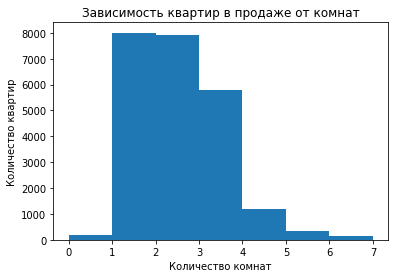

In [43]:
plt.hist(data['rooms'], bins=7, range=(0,7))
plt.title('Зависимость квартир в продаже от комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Среди предложений больше всего однокомнатных квартир. С увеличением комнат количество предложений снижается почти линейно.

# Высота потолков 


In [44]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.698746
std          0.253630
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

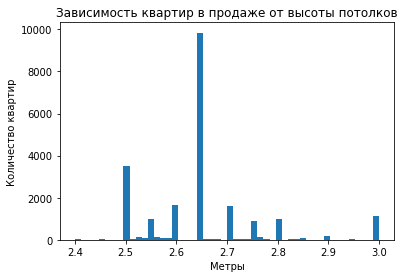

In [45]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=50, range=(2.4,3))
plt.title('Зависимость квартир в продаже от высоты потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Среди большинства предложений высота составляет: 2.65 метров, далее: 2.5, 2.6, 2.7, 2.55 метров.

# Тип этажа квартиры («первый», «последний», «другой»)

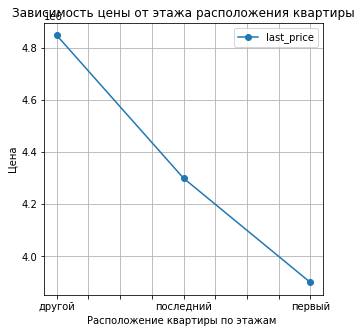

In [46]:
(
    data.pivot_table(index='type_apartment_floor', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Расположение квартиры по этажам ')
plt.ylabel('Цена')
plt.show()

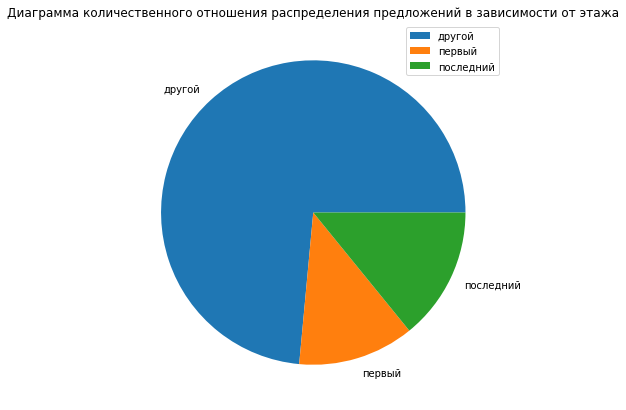

In [47]:
data.pivot_table(index='type_apartment_floor',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', title='Диаграмма количественного отношения распределения предложений в зависимости от этажа')

plt.show()

**Вывод**: Менее ценными считаются квартиры на "Первом" и "Последнем" этаже. На круговой диаграмме заметно, что общее количество предложений "Первого" и "Последнего" этажа составляет чуть больше 25% от общего количества предложений, значит люди хотят сьехать с этих этажей.

# Общее количество этажей в доме

In [48]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

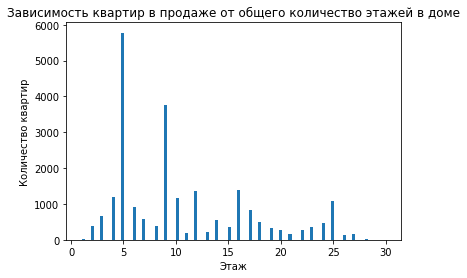

In [49]:
plt.hist(data['floors_total'], bins=100, range=(1,30))
plt.title('Зависимость квартир в продаже от общего количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках.

# Расстояние до центра города в метрах

In [50]:
data['city_centers_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

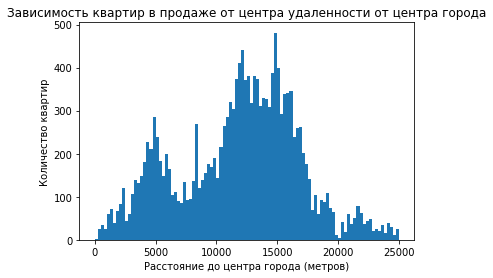

In [51]:
plt.hist(data['city_centers_nearest'], bins=100, range=(0,25000))
plt.title('Зависимость квартир в продаже от центра удаленности от центра города')
plt.xlabel('Расстояние до центра города (метров)')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии 12000 -15000 метров)), и значительным всплеском на расстоянии в 5000 метров от центра города.

# Расстояние до ближайшего парка 

In [52]:
data['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

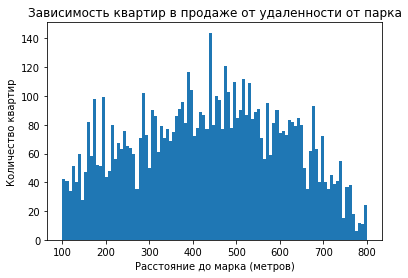

In [53]:
plt.hist(data['parks_nearest'], bins=100, range=(100,800))
plt.title('Зависимость квартир в продаже от удаленности от парка')
plt.xlabel('Расстояние до марка (метров)')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Количество предложений не сильно зависит от удаленности от ближайшего парка. Среднее расстояние до парка премерно составляет 200 - 700 метров.

**Общий вывод по разделу**:

    1) На рынке самое большое предложение квартир с общей площадью от 40 до 69 кв. метров с максимумом около 52 кв. метров.
    2) Больше всего продают квартир с жилой площадью около 18 кв. м и 30 кв. метров при этом прослеживается спад предложений в средней зоне 23 кв. метра.
    3) Прослеживается тенденция что больше всего предложений с площадью кухни в 6 метров затем 10 и чередом 7,8,9 кв. метров, при этом в анкетах заметны явные всплески на целых числах.
    4) Из гисторгаммы следует, что наиболее часто цена объекта составляет 3,8 - 4,2 млн. руб..
    5) Среди предложений больше всего однокомнатных квартир. С увеличением комнат количество предложений снижается почти линейно.
    6) Среди большинства предложений высота составляет 2.65 метров, далее 2.5, 2.6, 2.7, 2.55 метров.
    7) Менее ценными считаются квартиры на "первом" этаже. На круговой диаграмме заметно, что общее количество предложений "первого" и "последнего" этажа составляет почти 25% от общего количества, значит люди хотят сьехать с этих этажей.
    8) Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках.
    9) Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии 12000 -15000 метров), и значительным всплеском на расстоянии в 5000 метров от центра города.
    10) Количество предложений не сильно зависит от удаленности от ближайшего парка. Среднее расстояние до парка премерно составляет 200 - 700 метров.
    В заключении: Среднестатистическое предложение, это квартира в пятиэтажном доме средней площадью 52 кв. метра с кухней в 6 кв. метров, высотой потолков 2,65 метра, скорее всего однокомнатная или двухкомнатная с маленькими комнатками, на удалении 13 км. отцентра города.

# Изучаем, как быстро продавались квартиры

In [54]:
#Рассчитаем показатели 
print(data['days_exposition'].describe())

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


Время продаж


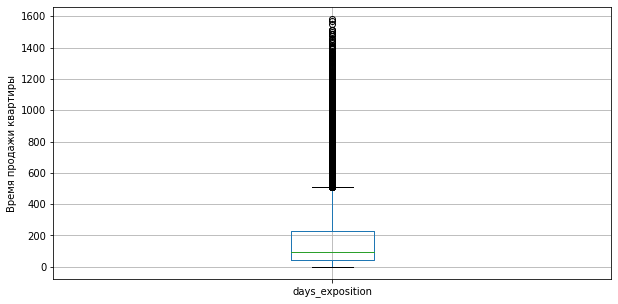

In [55]:
print('Время продаж')
data.boxplot('days_exposition', figsize=(10,5))
plt.ylabel('Время продажи квартиры')
plt.show()

In [56]:
data = data.query('days_exposition < 250')

Время продаж


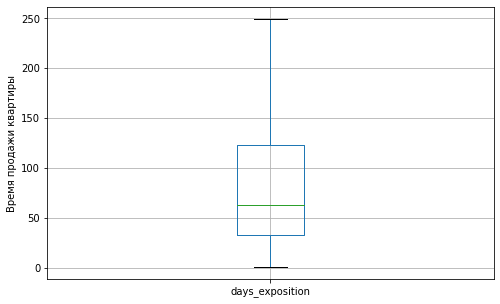

In [57]:
print('Время продаж')
data.boxplot('days_exposition', figsize=(8,5))
plt.ylabel('Время продажи квартиры')
plt.show()

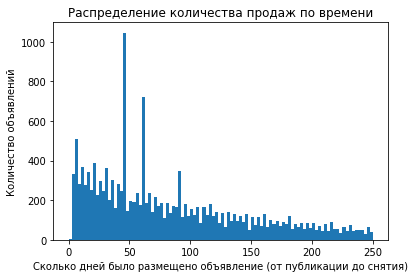

Среднее время продажи квартиры: 83.15474517818367
Медианное время продажи квартиры: 63.0


In [58]:
plt.hist(data['days_exposition'], bins=100, range=(0,250))
plt.title('Распределение количества продаж по времени')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()
print('Среднее время продажи квартиры:', data['days_exposition'].mean())
print('Медианное время продажи квартиры:', data['days_exposition'].median())

**Вывод**: 
    
    1) По времени продаж квартир: Среднее значение продажи составляет 180 дня, при этом медианное значение составляет 95 дня, оно более точно характеризует среднее время продажи, так как не зависит от выбрасов и нестандартных значений.
    2) В среднем продажа среднестатистичекой квартиры занимает 2-3 месяца в зависимотсти от сопутствующих факторов(площади, цены, удалённости от центра).
    3) Быстрыми продажами можно считать продажи состоявшиеся за 45 дней (в первом квартиле), а долгие продажи после 3 квартиля, которые вообще могут быть не проданными.
    

# Факторы влияния на стоимость 


In [59]:
print('Корреляция:','\n')
print(data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms','day_publication','month_publication','year_publication']).corr(),'\n')

Корреляция: 

                   day_publication  kitchen_area  last_price  living_area  \
day_publication           1.000000      0.657584    0.075838    -0.047594   
kitchen_area              0.657584      1.000000    0.457623     0.284104   
last_price                0.075838      0.457623    1.000000     0.657705   
living_area              -0.047594      0.284104    0.657705     1.000000   
month_publication         0.482826     -0.125355   -0.085347    -0.142040   
rooms                    -0.113772      0.280472    0.493761     0.918552   
total_area                0.184914      0.564403    0.757541     0.936515   
year_publication         -0.283846     -0.439312   -0.100977    -0.269511   

                   month_publication     rooms  total_area  year_publication  
day_publication             0.482826 -0.113772    0.184914         -0.283846  
kitchen_area               -0.125355  0.280472    0.564403         -0.439312  
last_price                 -0.085347  0.493761    0.757

In [60]:
print('Корреляция:','\n')
print(data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr(),'\n')

Корреляция: 

              kitchen_area  last_price  living_area     rooms  total_area
kitchen_area      1.000000    0.457623     0.284104  0.280472    0.564403
last_price        0.457623    1.000000     0.657705  0.493761    0.757541
living_area       0.284104    0.657705     1.000000  0.918552    0.936515
rooms             0.280472    0.493761     0.918552  1.000000    0.841802
total_area        0.564403    0.757541     0.936515  0.841802    1.000000 



Корреляция по данным указывает, прямой зависимости среди данных нет. Возможно это произошло из за наличия большого количества редких и выбивающихся значений.
Проведем обработку этих значений.

In [61]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    q = data.loc[(data[column] < q3 + 1.5*iqr) & (data[column] > q1 - 1.5*iqr), column]
    return q
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height' ]
for col in list_features:
    data[col] = quartile_range(data, col)

/tmp/ipykernel_175/3554228294.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = quartile_range(data, col)
/tmp/ipykernel_175/3554228294.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = quartile_range(data, col)
/tmp/ipykernel_175/3554228294.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [62]:
print('Корреляция:','\n')
print(data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr(),'\n')

Корреляция: 

              kitchen_area  last_price  living_area     rooms  total_area
kitchen_area      1.000000    0.795317     0.406431  0.158085    0.630011
last_price        0.795317    1.000000     0.820584  0.712108    0.965112
living_area       0.406431    0.820584     1.000000  0.920266    0.929410
rooms             0.158085    0.712108     0.920266  1.000000    0.832994
total_area        0.630011    0.965112     0.929410  0.832994    1.000000 



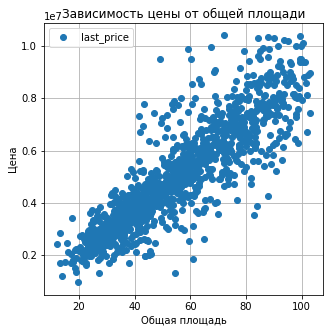

Корреляция Пирсона: 0.6727545811457804


In [63]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()
print('Корреляция Пирсона:', data['total_area'].corr(data['last_price']))

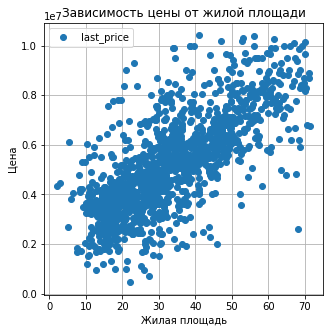

Корреляция Пирсона: 0.5529827551451848


In [64]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()
print('Корреляция Пирсона:', data['living_area'].corr(data['last_price']))

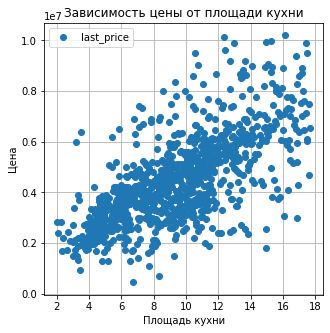

Корреляция Пирсона: 0.47692432372738813


In [65]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()
print('Корреляция Пирсона:', data['kitchen_area'].corr(data['last_price']))

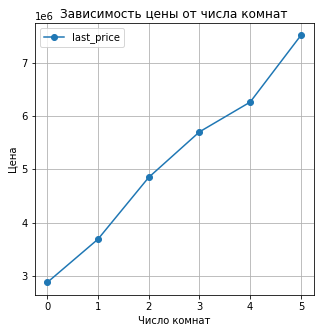

Корреляция Пирсона: 0.4411310138229856


In [66]:
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена')
plt.show()
print('Корреляция Пирсона:', data['rooms'].corr(data['last_price']))

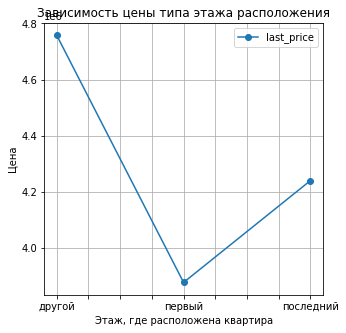

In [67]:
(
    data.pivot_table(index='type_apartment_floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены типа этажа расположения')
plt.xlabel('Этаж, где расположена квартира')
plt.ylabel('Цена')
plt.show()

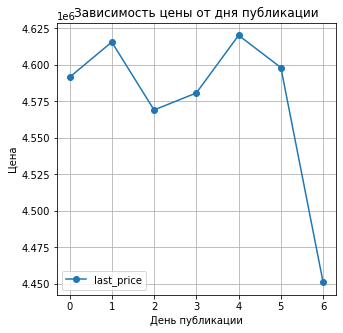

In [68]:
(
    data.pivot_table(index='day_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от дня публикации')
plt.xlabel('День публикации')
plt.ylabel('Цена')
plt.show()

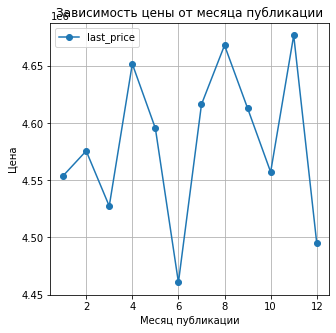

In [69]:
(
    data.pivot_table(index='month_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена')
plt.show()

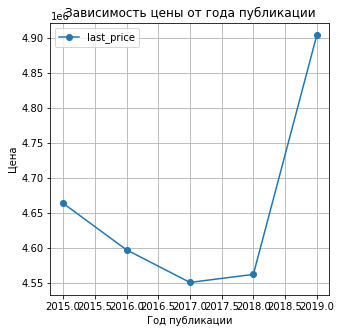

In [70]:
(
    data.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Цена')
plt.show()

**Вывод**: 

    1) Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.
    2) Число комнат влияет на цену (больше комнат -> больше жилая площадь -> больше цена), однако зависимость ниже, чем у площади, так как бывают квартиры с большими по площади комнатами и квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.
    3) Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.
    4) Прослеживается слабая зависимость между: ценой и днем публикации; ценой и площадью кухни.

# Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [71]:
price_sm_name = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
price_sm_name.columns = ['count']
price_sm_name = price_sm_name.sort_values(by='count', ascending=False).head(10)
price_sm_name['price_square_meter'] = data.pivot_table(index='locality_name', values='price_square_meter').round(2)
price_sm_name.sort_values(by='price_square_meter', ascending=False)

,count,price_square_meter
locality_name,,
санкт-петербург,9246,110979.31
пушкин,208,100732.82
кудрово,349,95019.57
парголово,241,88995.69
мурино,457,86223.33
шушары,331,78120.13
колпино,255,74896.62
всеволожск,247,69346.78
гатчина,199,68489.45


**Вывод**:
Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также небольшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

**Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра**

In [72]:
data.query('locality_name == "санкт-петербург"')['distance_city_center'].describe()

count    10388.000000
mean        11.965826
std          4.644468
min          0.000000
25%          9.000000
50%         13.000000
75%         15.000000
max         29.000000
Name: distance_city_center, dtype: float64

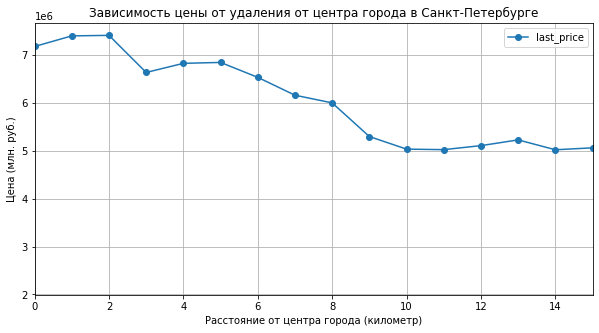

Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург


,last_price
distance_city_center,
0.0,7.181667e+06
1.0,7.403292e+06
2.0,7.414423e+06
3.0,6.639053e+06
4.0,6.829605e+06
5.0,6.848766e+06
6.0,6.536550e+06
7.0,6.163286e+06
8.0,6.003142e+06


In [73]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()
print('Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург')
data.query('locality_name == "санкт-петербург" and distance_city_center<=13').pivot_table(values='last_price', index='distance_city_center')

**Вывод**: Самые дорогие квартиры в центре города и их стоимость уменьшается c увеличением расстояния от центра города до 9 километров, далее стоимость не зависит от удаления.

### Напишем общий вывод

**Общий вывод**:

В процессе исследования объявлений о продаже квартир были выполнены следующие этапы и сделаны выводы:
1) Изучили общую информацию о данных:
    
    В данных 23699 записи. Для целого ряда столбцов, есть пропущенные значения и некорректный тип данных. По гисторгаммам видно, что в данных есть аномальные значения. Явные дубликаты отсутствуют. Данные признаны полными и достаточными для исследования.
2) Выполнена предобработка данных:

    Основными причинами пропусков могли стать:
    - Человеческий фактор
    - Возможны программные сбои
    - Ранее введенные данные не откорректированы

    В процессе предобработки данных:
    - Переименовали название столбца cityCenters_nearest на city_centers_nearest.
    - Заполнили явные пропуски в таблице.
    - Изменили тип данных, в соответствии с данными находяшимися в столбцах.
    - В столбцах last_price, floors_total, balcony, parks_around3000, ponds_around3000 тип данных должны быть целочисленными, is_apartment - булевым, а first_day_exposition - тип даты и времени

3) Добавлены новые столбцы в таблицу для проведения следующего этапа:
    
    - price_square_meter - цена квадратного метра объекта с точностью до двух знаков после запятой.
    - day_publication - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).
    - month_publication - месяц публикации объявления.
    - year_publication - год публикации объявления.
    - type_apartment_floor - тип этажа квартиры (значения — «первый», «последний», «другой»).
    - distance_city_center - расстояние до центра города в целых километрах.
4) Проведен исследовательский анализ данных: 
    
    - Изучены и описаны параметры:
    Среднестатистическое предложение, это квартира в пятиэтажном доме средней площадью 52 кв. метра с кухней в 6 кв. метров, высотой потолков 2,65 метра, скорее всего однокомнатная или двухкомнатная с маленькими комнатками, на удалении 13 км. или 5 км. от центра города.
    - Изучено, как быстро продавались квартиы:
    Среднее значение продажи составляет 180 дня, при этом медианное значение составляет 95 дня, оно более точно характеризует среднее время продажи, так как не зависит от выбросов и нестандартных значений.
    В среднем продажа средне статистической квартиры занимает 2-3 месяца в зависимости от сопутствующих факторов(площади, цены, удалённости от центра).
    Быстрыми продажами можно считать продажи состоявшиеся за 45 дней (в первом квартиле), а долгие продажи после 3 квартиля, которые могут совсем не продаваться.
    - Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта:
    Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.
    Число комнат влияет на цену (больше комнат -> больше жилая площадь -> больше цена), однако зависимость ниже, чем у площади, так как бывают квартиры с большими по площади комнатами и квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.
    Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.
    Прослеживается слабая зависимость между: ценой и днем публикации; ценой и площадью кухни.
    - Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: 
    Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также небольшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.
    - Вычислена средняя стоимость квартиры на разном удалении от центра Санкт-Петербурга:
    Самые дорогие квартиры в центре города и их стоимость уменьшается c увеличением расстояния от центра города до 9 километров, далее стоимость не зависит от удаления